### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

***

In [3]:
# importing libraries

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.default_rng(seed=1023)

## 1. Conditional Probability

I secretly roll a (fair) 6-sided die and I ask you: *Guess the number I got?* What's the probability of you guessing right? We know pretty solid by now it's 1/6, and we know why it's 1/6. But if I ask you: *I got an even number. Guess the number I got?*, then your chances of guessing right get better with more information. What are the chances of you guessing the right number now? It's not hard to answer: 1/3 (*but why?*). 

I tell you that I got 4. I roll the die secretly again, and ask you again: *Guess the number I got now?* What would be the probability of you guessing the right number now? Is it 1/6 again? Or not? 


I roll a die two times now. I tell you **one of** the numbers was 4. *Guess the other other number.* And what would be the probability of making a right guess now? 1/6 again? Or not?

To answere these questions (or check our answers) it would be nice if we had some theoretical way to calculate these probabilities. Fortunately, we do. Previous scenarios describe what are called *conditional events*, and to compute probability of those events we use the *conditional probability* formula:

$$P(A|B) = \frac{P(AB)}{P(B)},$$

where with $P(A|B)$ we denote the probability of event $A$ occuring, under the *condition* that the event $B$ has already occured. Probability $P(A)$ is called often called *prior* and conditional probability $P(A|B)$ is *posterior*.

So, let's do some math and use the formula above to approve (or dissaprove) our intuition.

I roll a die and tell you I got an even number. You make a guess on the result; say, 6. The probability of making the right guess:

$$P(X=6|X{\rm\ is\ even}) = \frac{P(\{X=6\}\cap\{X{\rm\ is\ even}\})}{P(X{\rm is\ even})} = \frac{P(\{6\}\cap\{2, 4, 6\})}{P(\{2, 4, 6\})} = \frac{P(\{6\})}{P(\{2, 4, 6\})} = \frac{\frac{1}{6}}{\frac{3}{6}} = \frac{1}{3}.$$

***

Nice chances, but bad guess - it was a 4. Now I roll it again. You try 6 again. Your chances of getting it right this times are:

$$P(X_2 = 6|X_1 = 4) = \frac{P(\{X_2=6\}\cap\{X_1=4\})}{P(X_1=4)} = \frac{P(X_2=6)P(X_1=4)}{P(X_1=4)} = P(X_2=6) = \frac{1}{6}.$$

We would get the same result even if we changed our choice. 

But, we did something in our calculations 

$$P(\{X_2=6\}\cap\{X_1=4\}) = P(X_2=6)P(X_1=4).$$

Why this? Because, as we remember, each roll of a die is independent of the other. So $X_1$ and $X_2$ are *independent random variables* and we could 'split' the product. And, of course, we got 1/6 as the result - the same result as if we rolled the dice for the first time.

Once more, two events $A$ and $B$ are *(statistically) independent* if and only if

$$P(AB) = P(A)P(B).$$

Given the previous observation, we can state an equivalent definition: two events $A$ and $B$ are statistically independent if and only if 

$$P(A|B) = P(A)\ or\ P(B|A) = P(B);$$

or, put in simple words - two events are (statistically) independent if the probability of an outcome of one event is not influenced by the outcome of the other. 

Here we must underline the difference between *physical* and *statistical independance*. For example, if we roll two dices at once, *phisically* one die can influence the other due to physical collision. However, *statistically* they are independent, as $P(X_2|X_1) = P(X_2)$. In probability theory, statistical independance is the default one, so when we say *independent events* we assume that they are statistically independent, regardless of their physical (in)dependance.

***

Now, let's get back to our third question. I roll a die two times, tell you that one of the results is 4, and ask you to guess the other result. Will try 6? Would you try to guess it's 4? Why not?

Let's say you make a guess that it's 6. Your probability of being right is:

$$P({\rm one\ number\ is\ 4,\ the\ other\ is\ 6}|{\rm one\ number\ is\ 4}) 

= \frac{P(\{\rm one\ number\ is\ 4,\ the\ other\ is\ 6\}\cap\{{\rm one\ number\ is\ 4})\}}{P({\rm one\ number\ is\ 4})} 

= \frac{P(\{46, 64\}\cap\{41, 42, 43, 44, 45, 46, 14, 24, 34, 54, 64\})}{P(\{41, 42, 43, 44, 45, 46, 14, 24, 34, 54, 64\})} 

= \frac{P(\{46, 64\})}{P(\{41, 42, 43, 44, 45, 46, 14, 24, 34, 54, 64\})} = \frac{\frac{2}{36}}{\frac{11}{36}} = \frac{2}{11}.$$

So, that's not 1/6. But, does this information actually helps? Are your chances really better knowing an information of one results, or would you be just better guessing without knowing the result of one die?

In [4]:
2/11

0.18181818181818182

In [5]:
1/6

0.16666666666666666

The information about one outcome also helps you in another way - it tells you that you have smaller chances of guessing that the other outcome is another 4, as:

$$P({\rm one\ number\ is\ 4,\ the\ other\ is\ 4}|{\rm one\ number\ is\ 4}) = \frac{1}{11}.$$

***

Nothing consolidates a theoretical exposition better than the visual demonstration, especially if it's an [animated one](https://setosa.io/conditional/).

### Law of Total Probability

Let's take a look at the following example:


*Your lightbulb goes off. You go to the local store to buy a new one. The model you want to buy is produced by three different factories F1, F2 and F3. Factory F1 has the best quality checks, and the probability for a malfunctioning lightbulb to pass the checks in factory F1 is 0.1%. These probabilities are 0.15% and 0.2% for factories F2 and F3, respectively. Your local store gets lightbulbs from all three factories in ratio F1 : F2 : F3 = 50 : 30 : 20. You bought a lightbulb. What's the probability of buying a malfunctioning one?*

The answer would've been easy if we knew which factory produced the lightbulb we bought. But we don't, since they all come in the same package. And this is where the Law of Total Probability can helps us out. This Law is actually a formula, which allows us to calculate the probability of an event by *conditioning* it on the events that *partition* the set of all possible outcomes $\Omega$.

Let the events $E_1, E_2, \ldots, E_n$ partition the set $\Omega$; this means that the given events are *mutually exclusive* (or *disjoint*) such that 

$$\Omega = E_1 \cup E_2 \cup \cdots \cup E_n.$$

Then,

$$P(A) = P(A|E_1)P(E_1) + P(A|E_2)P(E_2) + \cdots + P(A|E_n)P(E_n).$$

Now, we can solve our problem, as we have all the information to implement the Law of Total Probability. 

From the distribution of lighbulbs in the local store, we have that

$$P(F_1) = \frac{50}{100} = 0.5,$$

$$P(F_2) = 0.3,$$

$$P(F_3) = 0.2 .$$

We also know, from the quality checks, that the probabilites of getting a broken lightbulb (event $A$), depending on the factory, are

$$P(A|F_1) = 0.001,$$

$$P(A|F_2) = 0.0015,$$

$$P(A|F_3) = 0.002.$$

Now, as we know, a given lightbulb can be produced from one and only one of the given factories, we have $F_1 \cup F_2 \cup F_3 = \Omega$, where events $F_1, F_2$ and $F_3$ are mutually exclusive. 

Applying the Law of Total Probability, we get

$$P(A) = 0.001\cdot 0.5 + 0.0015\cdot 0.3 + 0.002\cdot 0.2 = 0.00135.$$

So, the probability of buying a malfunctioning lightbulb is 0.135%.

In [6]:
.001*.5 + .0015*.3 + .002*.2

0.00135

***

As we saw, the Law of Total Probability comes quite handy to compute the prior when posteriors are known. This might sound wierd, but oftentimes poseriors/conditional probabilities are those that are either known upfront, or easily asserted. 


This can be useful when a random variable has a known distribution type, but it is uncertain which parameters it takes. In this case we condition RV on distributions' parameters. Let's illustrate this by an example.

*A test wiht 10 questions has two variants: easy and difficult. For easy one the probability of getting the right answer for each question is 0.9; for a difficult one its 0.45. Every fourth student gets a difficult test. What's the probability for a student to get five or less questions right?*

Let $X$ denote the number of right answers. Here we obviously work wiht Binomial Distribution, i.e. we can write $X\sim\mathcal{B}(10, p)$. But the parameter $p$ is uncertain. Here, we can condition $P(X)$ on the different values for parameter $p$ and use the Law of Total Probability:

$$P(X \leqslant 5) = P(X \leqslant 5|p=0.9)P(p=0.9) + P(X \leqslant 5|p=0.45)P(p=0.45).$$

We'll use Scipy to help us with the calculations.

In [7]:
from scipy.stats import binom

prob = binom.cdf(k=5, n=10, p=.9)*.75 + binom.cdf(k=5, n=10, p=.45)*.25
prob

0.18583552786137691

So, the probability of doing more than half of the test wrong is 18.58%.

### Bayes' Theorem

Given two events $A$ and $B$, we can define two conditional probabilities $P(A|B)$ and $P(B|A)$. Let's roll a die again, and compute the following conditional probabilities:

$$P(X\ {\rm is\ even}|X \leqslant 5) = \frac{P(\{X\ {\rm is\ even}\}\cap\{X\leqslant 5\})}{P(X\leqslant 5)} = \frac{P(\{2, 4, 6\}\cap\{1, 2, 3, 4, 5\})}{P(\{1, 2, 3, 4, 5\})} = \frac{P(\{2, 4\})}{P(\{1, 2, 3, 4, 5\})} = \frac{\frac{2}{6}}{\frac{5}{6}} = \frac{2}{5}.$$ 

$$\$$

$$P(X\leqslant 5|X\ {\rm is\ even}) = \frac{P(\{X\ {\rm is\ even}\}\cap\{X\leqslant 5\})}{P(X\ {\rm is\ even})} = \frac{P(\{2, 4\})}{P(\{2, 4, 6\})} = \frac{\frac{2}{6}}{\frac{3}{6}} = \frac{2}{3}.$$

But, is there a way to calculate one from the other? Obviouslly, they are not (even approximately) the same, and they don't add to 1 (and why should they even?). Again, Probability Theory gives us an elegant formula for this, in the form of *Bayes' Theorem*:

*If $P(A)\neq 0$, then:*

$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}.$$

Using Bayes' Theorem in the previous example, we demonstrate how the two conditional probabilities are connected:

$$P(X\leqslant 5|X{\rm is\ even}) = \frac{P(X{\rm is\ even}|X \leqslant 5)P(X\leqslant 5)}{P(X{\rm is\ even})} = \frac{\frac{2}{5}\cdot\frac{5}{6}}{\frac{1}{2}} = \frac{\frac{2}{6}}{\frac{1}{2}} = \frac{2}{3}.$$

***

Bayes' Theorem is actually quite easy to prove - it stems directly from the formula for conditional probability. Assume that $P(A)\neq 0$. If $P(B) = 0$, then the formula is satisfied trivially. Let now also be $P(B)\neq 0$. From the formula for conditional probability we obtain

$$P(A|B) = \frac{P(AB)}{P(B)} \quad\Rightarrow\quad P(AB) = P(A|B)P(B),$$

and

$$P(B|A) = \frac{P(BA)}{P(A)} \quad\Rightarrow\quad P(BA) = P(B|A)P(A).$$

Since $P(AB)=P(BA)$, we obtain 

$$P(B|A) = \frac{P(AB)}{P(B)} = \frac{P(A|B)P(B)}{P(A)}.\ \blacksquare$$

Bayes' Theorem has a quite interesting *epistemological (or Bayesian)* interpretation:

- prior $P(B)$ is our initial *degree of belief* in event $B$;


- posterior $P(B|A)$ is our degree of belief in the event $B$ after receiving the information that $A$ is true;


- the ratio $\frac{P(A|B)}{P(A)}$ is the *support* which event $A$ provides for belief in $B$. 

***

Bayes' Theorem is at its most useful when one of the conditional probabilities $P(A|B)$ or $P(B|A)$ is much easier to compute, or straightforward available. To illustrate this, we go back to our previous example of students taking the test with two variants. Now we ask a question: *If we know a student did just five or less questions right, what's the probability that they obtained an easier variant?*

So, here we need to compute $P(p=0.9|X\leqslant 5)$.

Using Bayes' Theorem, we have


$$P(p=0.9|X\leqslant 5) = \frac{P(X \leqslant 5|p=0.9)P(p=0.9)}{P(X\leqslant 5)},$$

and using Scipy with previously obtained answer that $P(X\leqslant 5)\approx 0.1858$, we get:

In [8]:
prob_2 = (binom.cdf(k=5, n=10, p=.9)*.75)/prob
prob_2

0.00659832414238185

So, it's quite a small chance that a student would do an easy variant so badly - some 0.66%.

This is a simple illustration of how Bayes' Theorem can be used for *parameter estimation*. Calculating the probabilty of an outcome, given that the parameters of the distribution are known is (relatively) easy - we just need to know the p.m.f/p.d.f/c.d.f of the given distribution, and then we can just plug in the proper values to obtain the result. Estimating unknown parameters of a given distribution based on an outcome - is the difficult variant of the question.

With this comes the concept of *likelihood*, which is simply defined as

$$\mathcal{L}(A|B) = P(B|A).$$

So, the likelihood of the event $A$ occuring given that the event $B$ has occured is equal to the conditional probability of event $B$ occuring under the condition that the event $A$ has occured. 

If the speak in terms of random varable and distribution parameters we usually write 

$$\mathcal{L}(\theta; X) = P(X; \theta) = P_{\theta}(X),$$

where $X$ is RV and $\theta$ are its distributions' parameters (when there is a single parameter $\theta$ is scallar, and when there are multiple parameters ${\theta}$ is a vector).

We can rewrite the Bayes' Theorem in the form which is convenient for parameter estimation:


$$P(\theta; X) = \frac{\mathcal{L}(\theta; X)P(\theta)}{P(X)}.$$

As seen in the previous example, the *likelihood* that distribution's parameter has a certain value, given the outocme $\big(\mathcal{L}(p=0.9;\ X\leqslant 5)\big)$, was an information we obtained easily; however, the *probability* that the parameter takes a certain value if a certain event has occured $\big(P(p=0.9; X\leqslant 5)\big)$ was obtained indirectly from the likelihood, via Bayes' Theorem.

In [9]:
#likelihood
like = binom.cdf(k=5, n=10, p=.9)
like

0.0016349373999999977

In [10]:
#probability
(like*.75)/prob

0.00659832414238185

Likelihood is a **very** important concept in Machine Learning, and we'll get to learn more abot likelihood, and how it connects to Machine Learning in further sessions of the course. 

#### Understanding How the Parameter θ Appears in Likelihood and Probability Formulas

In statistics and probability, `θ` represents an unknown parameter that we want to estimate. It could be:

> Any other parameter defining a probability model

> The probability of success pp in a binomial distribution

> The mean μμ of a normal distribution

### 1️⃣ Probability Formula: P(X∣θ)P(X∣θ) (Likelihood of Observing Data)

The probability formula tells us how likely it is to observe some data XX given a specific parameter θθ.

For example, if we assume that XX follows a binomial distribution:

P(X|θ) = math.combine(n,X)*θ^X * (1-θ)^n-X

#### Here is:

- X is the observed number of successes (data).

- θ is the probability of success (parameter).

- P(X∣θ)P(X∣θ) tells us how likely it is to observe XX given θθ.


#### 2 Why Do We Get P(θ∣X)? (Bayesian Inference)

P(θ∣X)=P(X∣θ)P(θ)​ / P(X)

- P(θ) is the prior (what we believed about θ before seeing data).

- P(X∣θ)is the likelihood (how well θ explains the data).

- P(X)is a normalizing constant (total probability of observing X).

- P(θ∣X) is the posterior (updated belief about θ after seeing data).

This means that after collecting data, we don’t just guess a single θθ, but instead get a probability distribution over θθ, showing which values are more likely.

Here's one more example to distinguish between likelihood an probability. Observe the following three Binomial Distributions (and predent we don't know its parameters :V):

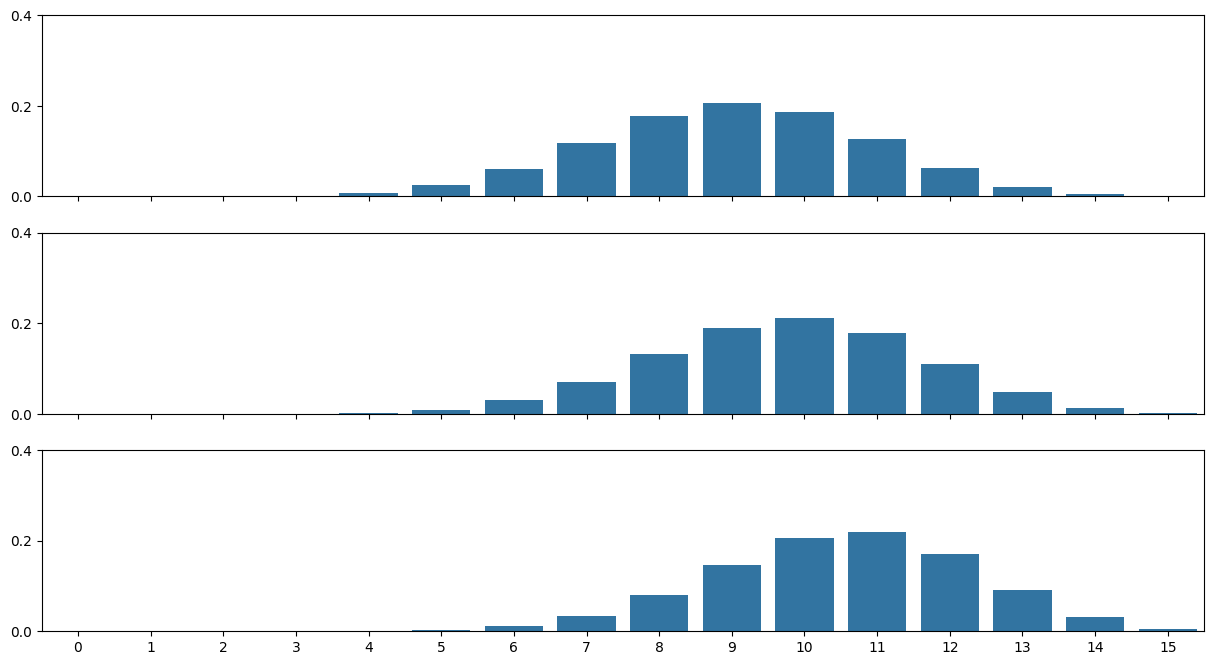

In [12]:
outcomes_1 = rng.binomial(15, .6, size=10**7)
no_outcomes_1 = np.unique(outcomes_1, return_counts=True)

outcomes_2= rng.binomial(15, .65, size=10**7)
no_outcomes_2 = np.unique(outcomes_2, return_counts=True)

outcomes_3 = rng.binomial(15, .7, size=10**7)
no_outcomes_3 = np.unique(outcomes_3, return_counts=True)


fig, ax = plt.subplots(3, 1, figsize=(15, 8), sharex=True)

sns.barplot(ax = ax[0], x = no_outcomes_1[0], y = no_outcomes_1[1]/10**7)
sns.barplot(ax = ax[1], x = no_outcomes_2[0], y = no_outcomes_2[1]/10**7)
sns.barplot(ax = ax[2], x = no_outcomes_3[0], y = no_outcomes_3[1]/10**7)


ax[0].set_yticks(np.arange(0, .6, .2))     
ax[1].set_yticks(np.arange(0, .6, .2)) 
ax[2].set_yticks(np.arange(0, .6, .2));

By reading of the chart, we can easily get the *likelihood* $\mathcal{L}(\theta; X=11) = P(X=11; \theta)$ for any of the three given distributions, just by reading off the chart; and even without knowing parameters $\theta$ explicitly But what about $P(\theta; X=11)$ for all three distributions? Can we tell the probability of drawing our sample from one of the three distributions, given that the result was $X = 11$. Sure, by looking at the chart we can say it is most probable that the third distribution gives the observed outcome, but we can't say that exact probability from the chart alone.

## 2. Multivariate Random Variables

As our "ordinary", i.e. deterministic variables can be one- or more dimensional, the same holds for random variables. Up so far we worked with *univariate* RVs that can take a onedimensional, i.e. scalar value $X$. *Multivariate* random variables take multidimensional values, i.e. vector values $\mathbf{X} = (X_1, X_2, \ldots, X_n)$, each with assigned probability. 

### Discrete-Type Multivariate Random Variables

One example of discrete-type multivariate RV is rolling, say, four 6-sided dice. We can write an outcome of such roll as 4-dimensional vector $\mathbf{X} = (4, 3, 3, 1)$, where each number represents an outcome of a single die. 

A *joint p.m.f* for two-dimensional RV is usually represented via *contingency table*. Assume that we have a group of 100 people, and we want to see how many of the female members of the group are left/right-handed, and same for the male members. We obrain the following counts:

In [13]:
df = pd.DataFrame()

df['Gender'] = ['Male', 'Male', 'Female', 'Female']
df['Handedness'] = ['Left', 'Right', 'Left', 'Right']
df['Counts'] = [9, 43, 4, 44]


pivo = df.pivot_table(index='Gender', columns='Handedness', values='Counts')
pivo

Handedness,Left,Right
Gender,,
Female,4,44
Male,9,43


Dividing these values by 100 we obtain percentages (and probabilities to draw a member with given characteristics from the group):

In [15]:
pivo/100

Handedness,Left,Right
Gender,,
Female,0.04,0.44
Male,0.09,0.43


Now, we can read off the table the probability to select a left-handed member of the group at random - it's 0.04. 

We can also calculate the probability to randomly select a female member of the group by summing the probabilities in the first row - it's 0.48; or, the probability to select a right-handed person, by summing all the probabilities in the second column - it's 0.87. These probabilites - fore one 'coordinate' of the multivariate RV to take a certain value - are called *marginal probabilities*. 

In [17]:
df.pivot_table(index='Gender', columns='Handedness', values='Counts', margins=True, aggfunc='sum')/100

Handedness,Left,Right,All
Gender,,,
Female,0.04,0.44,0.48
Male,0.09,0.43,0.52
All,0.13,0.87,1.00


We can also notice that the sum of all the probabilities in the contingency table equals to 1. As for the case of univariate p.m.f, the same has to be fulfilled for the multivariate p.m.f.

***

Let's now define our multivariate RV $(X, Y)$ via the following contingency table/p.m.f:

In [18]:
df = pd.DataFrame()
df['X'] = [1, 1, 1, 2, 2, 2]
df['Y'] = [1, 2, 3, 1, 2, 3]
df['Probabilities'] = [.01, .05, .1, .15, .45, .24]

df.pivot_table(index='X', columns='Y', values='Probabilities')

Y,1,2,3
X,,,
1,0.01,0.05,0.10
2,0.15,0.45,0.24


In [19]:
#with marginal probabilities

df.pivot_table(index='X', columns='Y', values='Probabilities', margins=True, aggfunc='sum')

Y,1,2,3,All
X,,,,
1,0.01,0.05,0.10,0.16
2,0.15,0.45,0.24,0.84
All,0.16,0.50,0.34,1.00


We write

$$P(X=1, Y=3) = p_{13} = 0.1,$$

$$P(X = 2) = p_{21} + p_{22} + p_{23} = 0.84,$$

$$P(Y=1) = p_{11} + p_{21} = 0.16,$$

$$P(\Omega) = \sum_{i=1}^{2}\sum_{j=1}^3p_{ij} = 1.$$

In [20]:
X = [1, 2]
Y = [1, 2, 3]
probs = df['Probabilities'].values


XY = [(x, y) for x in X for y in Y]

outcomes = rng.choice(XY, size=10**6, p=probs)
outcomes_count = np.unique(outcomes, return_counts=True, axis=0)
outcomes_count

(array([[1, 1],
        [1, 2],
        [1, 3],
        [2, 1],
        [2, 2],
        [2, 3]]),
 array([ 10030,  49928, 100053, 150411, 449757, 239821], dtype=int64))

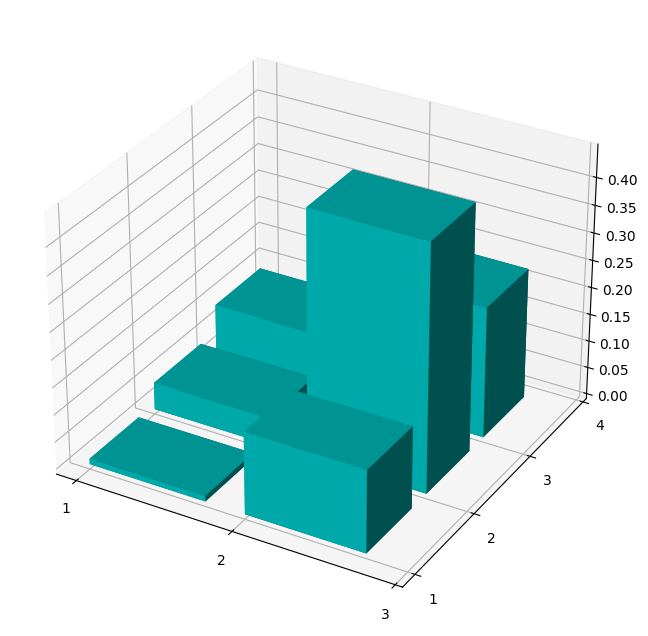

In [24]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

bottom = np.zeros_like(6)
width = depth = .75

ax.bar3d(np.array([1, 1, 1, 2, 2, 2]), np.array([1, 2, 3, 1, 2, 3]),
         bottom, width, depth, outcomes_count[1]/10**6, shade=True, color='c')


ax.set_xticks([1, 2, 3])
ax.set_yticks([1, 2, 3, 4]);

Suppose that we have two RVs that both have $X_1, X_2 \sim \mathcal{B}(10,\ 0.5)$. We draw a big sample for multivariate RV $(X_1, X_2)$ and plot the results

In [29]:
def sample_mrv_from_binomial(p_1, p_2, f='pmf'):

    
    
    X = rng.binomial(n=10, p=p_1, size=10**6)
    Y = rng.binomial(n=10, p=p_2, size=10**6)


    XY = np.zeros((11, 11))
    for x, y in zip(X, Y):
            XY[x, y] += 1

    _XY = np.meshgrid(np.arange(0, 11, 1), np.arange(0, 11, 1))
    
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')

    bottom = np.zeros_like(11)
    width = depth = .5
    
    if f == 'pmf':
        z = XY.ravel()/10**6
    elif f == 'cdf':
        z = np.cumsum(XY.ravel()/10**6)
    
    
    ax.bar3d(_XY[1].ravel(), _XY[0].ravel(), bottom, width, depth, z, shade=True, color='m')

    ax.set_xlim(10, 0)
    ax.set_ylim(10, 0)

    
    ax.set_xticks(np.arange(0, 12, 1))
    ax.set_yticks(np.arange(0, 12, 1))
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('P(X, Y)')

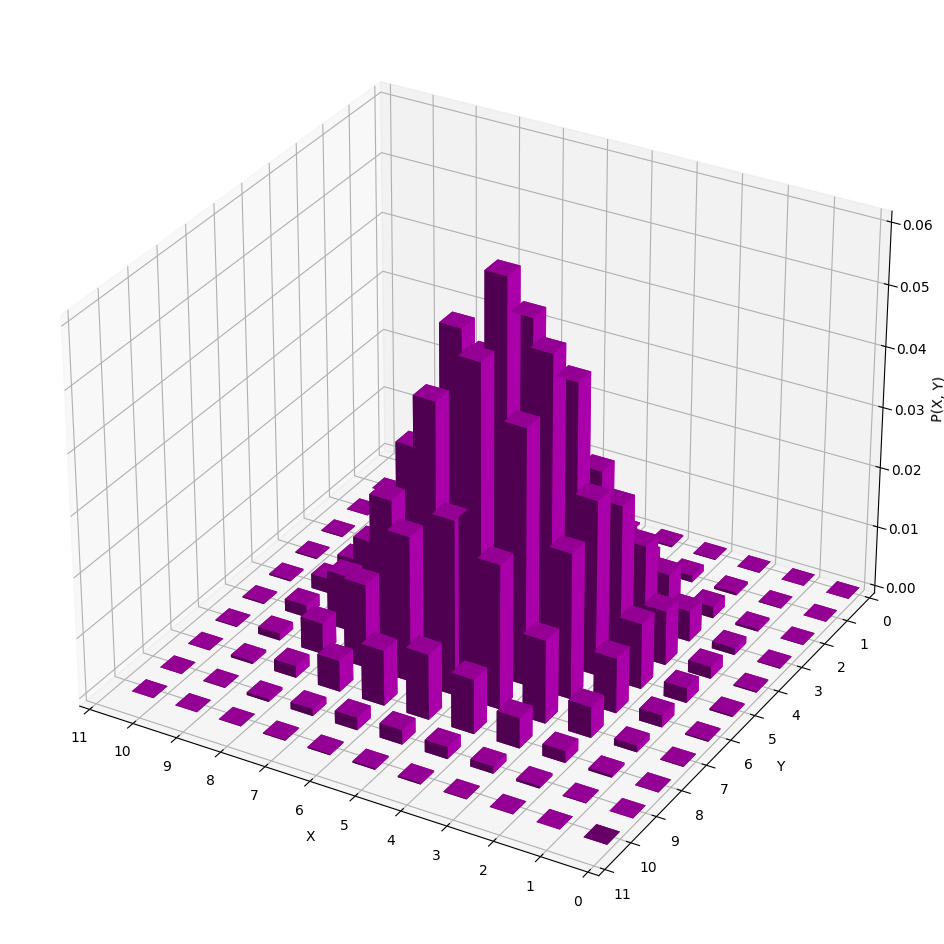

In [30]:
sample_mrv_from_binomial(p_1=.5, p_2=.5)

We can play around and change parameter values $p_1$ and $p_2$ for corresponding RVs:

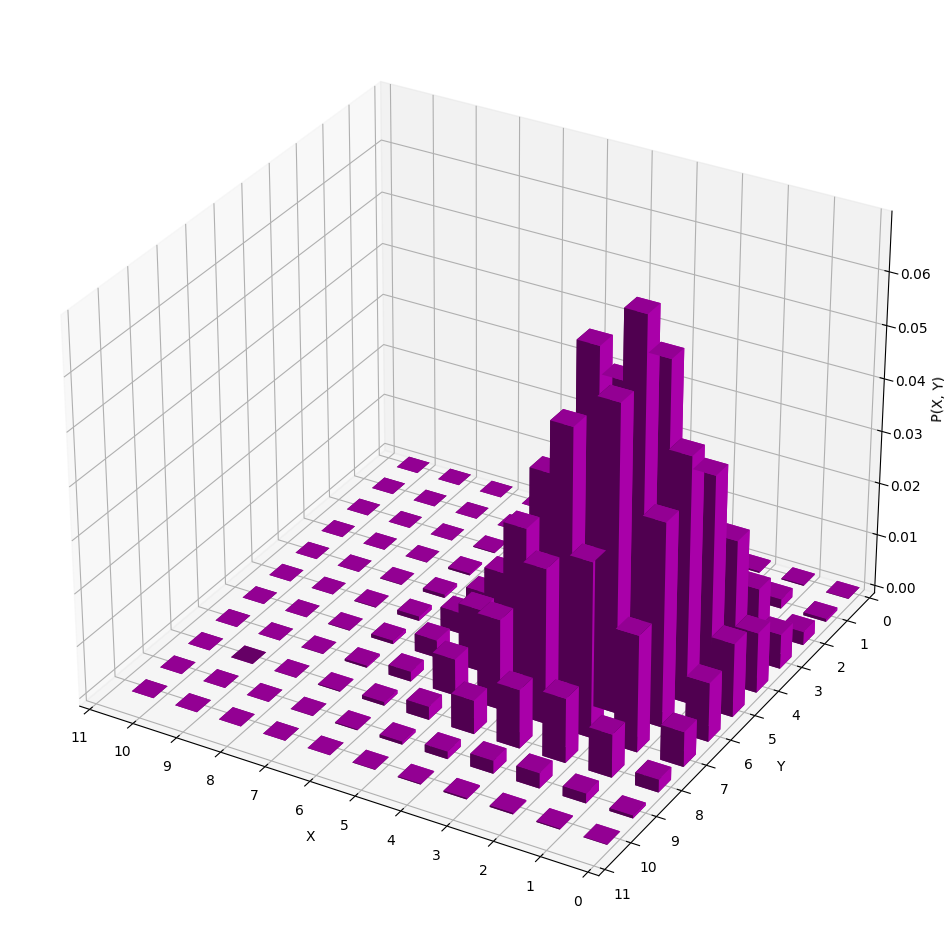

In [31]:
sample_mrv_from_binomial(p_1=.25, p_2=.5)

And here's the cumulative function:

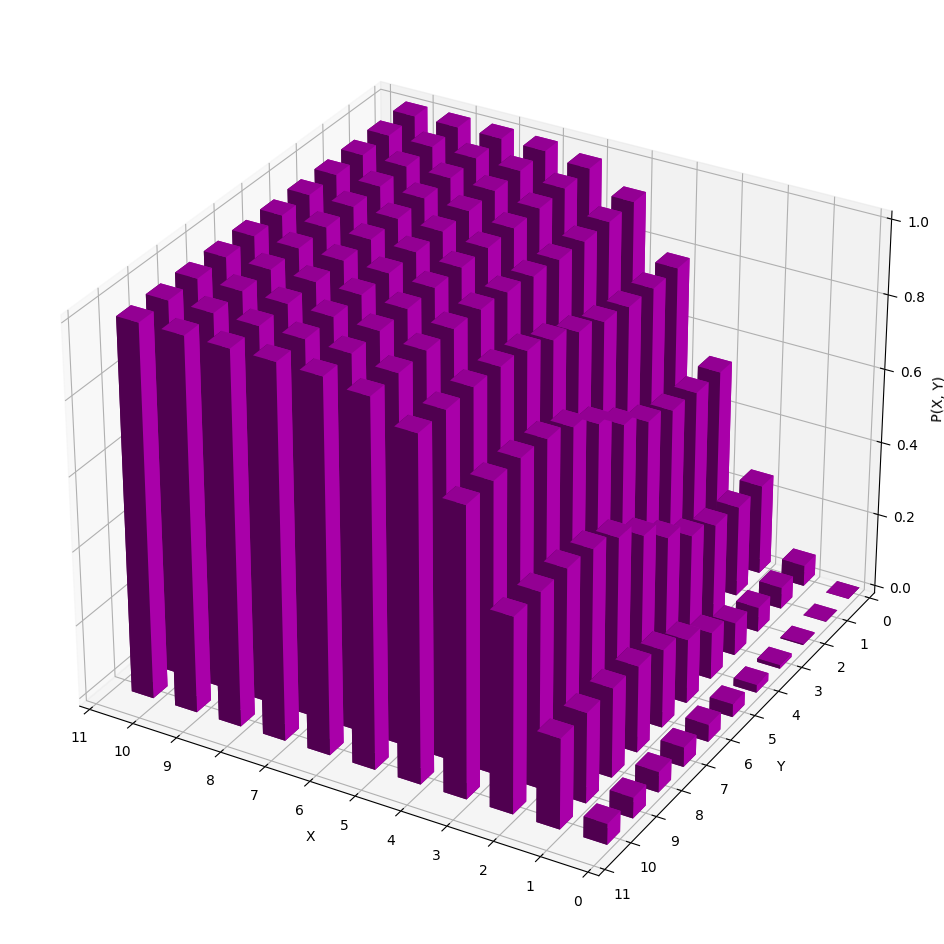

In [32]:
sample_mrv_from_binomial(p_1=.25, p_2=.5, f='cdf')

### Continuous-Type Multivariate Random Variables

As with univariate continuous RVs, we can define multivariate continuous RVs via appropriate p.d.f. For 2D continuous RV its p.d.f $\varphi(x, y)$ would be a (almost everywhere) continuous, non-negative *surface* in 3D space for which 

$$\int\int_{\mathbb{R}^2}\varphi(x, y)dxdy = 1.$$

This p.d.f is usually called *joint p.d.f*.

For the univariate continuous RV we calculated probabilities on real-line intervals as an *area under the p.d.f curve* over those intervals. For 2D continuous RVs we calculate a probability that a given point $(x,y)$ belongs to some 2D set $A\subset\mathbb{R}^2$; this probability is computed as a *volume under the joint p.d.f surface* over the area defined by $A$:

$$P\big((X, Y)\in A\big) = \int\int_A\varphi(x, y)dxdy.$$

To compute marginal probabilities for one 'coordinate' of multivariate continuous RV, we need its *marginal p.d.f* $\varphi_X(x)$; it is obtaned by taking the integral of joint p.d.f on all values of the other coordinate:

$$\varphi_X(x) = \int_{-\infty}^{+\infty}\varphi(x, y)dy.$$

This is all completely analoguous with marginal probabilities for discrete-types multivariate RVs. 

### Multivariate Normal Distribution

Let $X\sim\mathcal{N}(\mu_X,\sigma_X^2)$ and $Y\sim\mathcal{N}(\mu_Y,\sigma_Y^2)$ be two univariate normally distributed RVs. Then, a multivariate RV $(X, Y)$ has a *Bivariate Normal Distribution* $\mathcal{N}(\boldsymbol\mu, \Sigma)$, which has a joint p.d.f


$$\varphi(x, y) = \varphi(\mathbf{x}) = \frac{\exp\Big(-\frac{1}{2}(\mathbf{x} - \boldsymbol\mu)^T\Sigma^{-1}(\mathbf{x} - \boldsymbol\mu)\Big)}{\sqrt{(2\pi)^2|\Sigma|}}.$$

Its shape takes the form of a 'bell-surface', and its parameters are

$$\boldsymbol\mu = (\mu_X, \mu_Y),$$

- its *mean vector*, which dictates the position of the peak of the bell-surface;

$$\Sigma = 
\begin{pmatrix}
\sigma_X^2 & \rho\sigma_X\sigma_Y\\
\rho\sigma_X\sigma_Y & \sigma_Y^2
\end{pmatrix},
$$

- its *covariance matrix*, which dictates the shape of the bell-surface. $\rho$ is the *correlation* between $X$ and $Y$;  $\ \Sigma^{-1}$ is the inverse of the covariance matrix, and $|\Sigma|$ is its determinant.

We'll speak more about correlation of two RVs in the next session, but for now let's say that the correlation of two RVs is the degree of how they are *linearly related*.

Distributions $\mathcal{N}(\mu_X,\sigma_X^2)$ and $\mathcal{N}(\mu_Y,\sigma_Y^2)$ are *marginal distributions* of $\mathcal{N}(\boldsymbol\mu, \Sigma)$.

In case we have $k$-dimensional Multivariate Normal Distribution $\mathbf{X} = (X_1, X_2, \ldots, X_k)\sim\mathcal{N}(\boldsymbol\mu, \Sigma)$, then mean vector $\boldsymbol\mu = (\mu_1, \mu_2, \ldots, \mu_k)$ is $k$-dimensional, and the covariance matrix $\Sigma$ has shape $k\times k$, and its entries are calculated via

$$\Sigma_{ij} = E[(X_i - \mu_i)(X_j - \mu_j)] = {\rm Cov}[X_i, X_j].$$

***

To sample from a Multivariate Normal Distribution in Numpy, we use `rng.multivariate_normal()` with arguments `mean` for mean vector and `cov` for a covariance matrix. 

Let $X\sim\mathcal{N}(100, 25)$ and $Y\sim\mathcal{N}(75, 16)$ be two Normally Distributed RVs with $\rho_{XY} = 0.8$. Let's draw a sample $(X, Y)\sim\mathcal{N}(\boldsymbol\mu, \Sigma)$ from a Bivariate Normal Distribution, with corresponding parameters. 

In [33]:
def sample_from_bivariate(mu_1, sigma_1, mu_2, sigma_2, rho, sample_size=10**5):
    
    mean = np.array([mu_1, mu_2])
    cov = np.array([[sigma_1**2, rho*sigma_1*sigma_2], [rho*sigma_1*sigma_2, sigma_2**2]])
    
    sample = rng.multivariate_normal(mean=mean, cov=cov, size=sample_size)
    
    sns.jointplot(x=sample[:, 0], y=sample[:, 1])
    

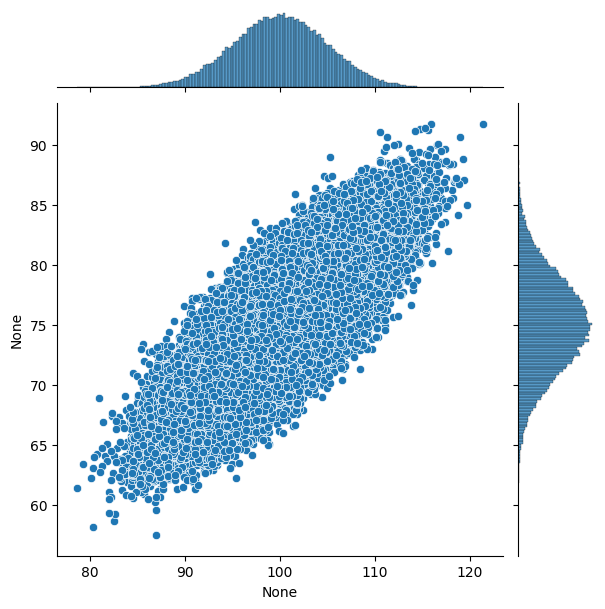

In [34]:
sample_from_bivariate(mu_1=100, sigma_1=5, mu_2=75, sigma_2=4, rho=.8, sample_size=10**5)

We can use Scipy to plot a p.d.f for a given Bivariate Normal Distribution using `.pdf()` method with `mean` and `cov` arguments from the `multivariate_normal` object of `scipy.stats` module.

In [35]:
from scipy.stats import multivariate_normal


def plot_bnd(mu_1, sigma_1, mu_2, sigma_2, rho):
        
    mean = np.array([mu_1, mu_2])
    cov = np.array([[sigma_1**2, rho*sigma_1*sigma_2], [rho*sigma_1*sigma_2, sigma_2**2]])
    
    distr = multivariate_normal(mean=mean, cov=cov)

    
    
    x = np.linspace(mu_1 - 3*sigma_1, mu_1 + 3*sigma_1, num=100)
    y = np.linspace(mu_2 - 3*sigma_2, mu_2 + 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)
    
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
    
    
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, pdf, cmap = 'mako')
    
    plt.xlabel("X")
    plt.ylabel("Y")

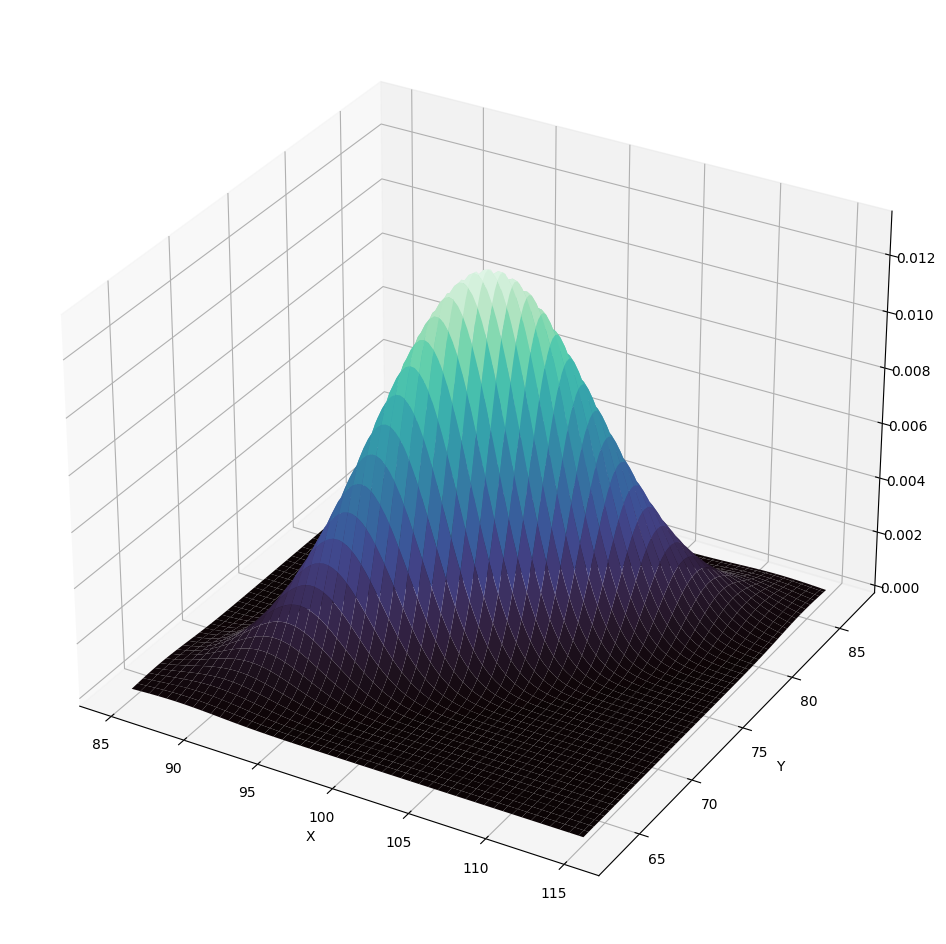

In [36]:
plot_bnd(mu_1=100, sigma_1=5, mu_2=75, sigma_2=4, rho=.8)

## 3. Sampling Mean and Standard Error

Let's recall the example from Session09 where we had to draw a sample of people and measure their height from the distribution $\mathcal{N}(176, 36)$:

In [ ]:
def sample_from_normal_hist(mu, sigma, sample_size=10**7, pop=True):
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    sample = rng.normal(loc=mu, scale=sigma, size=sample_size)
    
    sns.histplot(ax=ax, x=sample, bins=100)
    
    ax.axvline(mu, c='r')
    
    if pop:
        ax.yaxis.set_ticklabels([])
        ax.set_ylabel('')
    
    ax.set_xticks(np.arange(round(sample.min()) - 1, sample.max() + sigma, sigma))
    
    if not pop:
        ax.axvline(sample.mean(), c='r', linestyle='--')
        ax.legend(['Population Mean', 'Sample Mean'])
        print(f'Sample mean is {sample.mean():.2f}')

In [2]:
sample_from_normal_hist(176, 6)

NameError: name 'plt' is not defined

Now, the *population mean* here is $\mu = 176$. But what happens if we are able to draw just a sample of, say 250 people? What happens with the *sample mean* $\bar{\mu}$?

Sample mean is 176.13


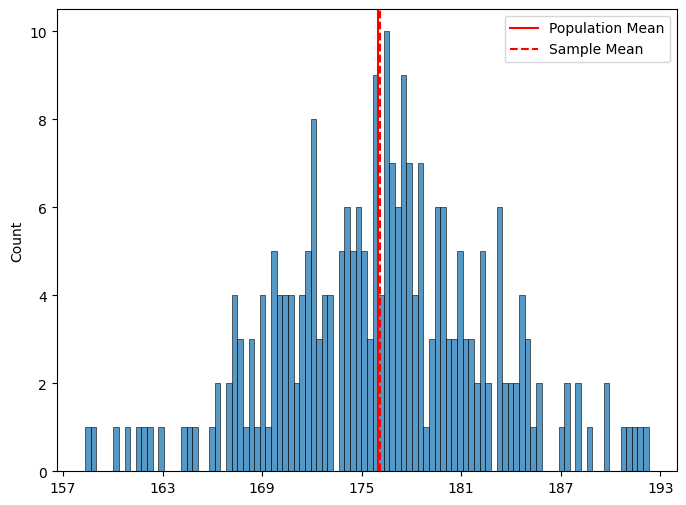

In [39]:
sample_from_normal_hist(176, 6, sample_size=250, pop=False)

So, as expected, there is a difference between $\mu$ and $\bar{\mu}$. Now, what if we are to draw many samples, how would those sample means be distributed? Say, we draw 1000 samples, each with 250 people:

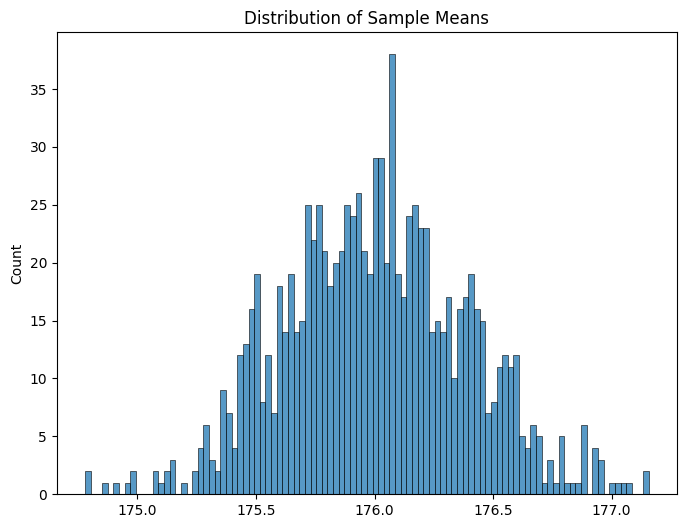

In [40]:
many_samples = rng.normal(loc=176, scale=6, size=(250, 1000))

fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(ax=ax, x=many_samples.mean(0), bins=100)
ax.set_title('Distribution of Sample Means');

Why, this looks a bit like a Normal Distribution. And if this were a normal distribution, what would its mean be, i.e. what is the *mean of sample means*?

In [41]:
many_samples.mean(0).mean()

176.00218604106325

That's almost the population mean $\mu$!

What if we drew, say, one million samples of size 250?

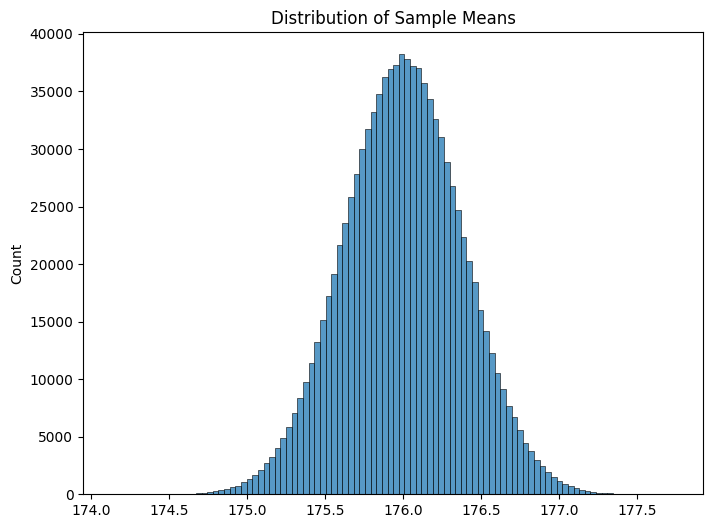

In [43]:
many_samples = rng.normal(loc=176, scale=6, size=(250, 10**6))

fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(ax=ax, x=many_samples.mean(0), bins=100)
ax.set_title('Distribution of Sample Means');

Yeah, it really looks like that sample means distribute accorting to the Normal Distribution. And theoretically this is true - if the population has a Normal Distribution, then the *sampling distribution* of the sampling mean is also Normal Distribution. But what about the parameters of this Normal Distribution? Let's compute the mean of sample means.

In [44]:
sm = many_samples.mean(0).mean()
sm

176.00015852367716

(Almost) exaclty as $\mu$. And theoretically, it is exactly as $\mu$. Mathematically we can write this:

$$E\bar{\mu} = \mu,$$

given that the underlying population is normally distributed. 

What about the standard deviation of the distribution of sample mean? If the population is normally distributed, this std is given by

$$\bar{\sigma} = \frac{\sigma}{\sqrt{n}},$$

where $\sigma$ is std of the population and $n$ the size of a singe sample. $\bar{\sigma}$ is called *standard error*, and it gives us measure of deviation of sample mean from the population mean. 

In [45]:
# approximate standard error
se = many_samples.mean(0).std(ddof=1)
se

0.3795865519540351

In [46]:
# theoreticall standard error
6/np.sqrt(250)

0.37947331922020555

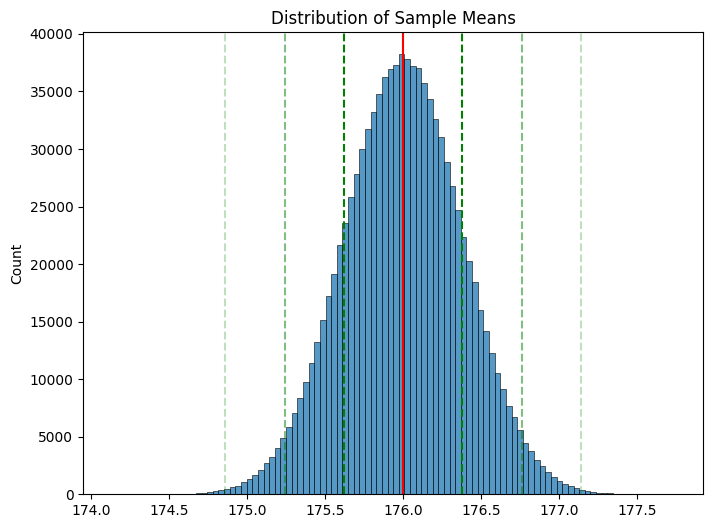

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(ax=ax, x=many_samples.mean(0), bins=100)

ax.axvline(sm, c='r')

ax.axvline(sm - se, c='g', linestyle='--')
ax.axvline(sm + se, c='g', linestyle='--')

ax.axvline(sm - 2*se, c='g', linestyle='--', alpha=.5)
ax.axvline(sm + 2*se, c='g', linestyle='--', alpha=.5)

ax.axvline(sm - 3*se, c='g', linestyle='--', alpha=.25)
ax.axvline(sm + 3*se, c='g', linestyle='--', alpha=.25)

ax.set_title('Distribution of Sample Means');

So, if RV $X\sim\mathcal{N}(\mu, \sigma^2)$, then the distribution of sample means is also normally distributed, with 

$$\bar{X}\sim\mathcal{N}\Big(\mu, \frac{\sigma^2}{n}\Big).$$

But, does the same holds if the population is not normally distributed? You'll check that out in the next session, when we speak about Central Limit Theorem. 

### Statistical Bias and Variance

In the example above we used the sample mean $\bar{\mu}$ as an *estimator* for the population mean $\mu$, obtaining $E\bar{\mu} = \mu$, or

$$E\bar{\mu} - \mu = 0.$$

Now, assume that we have some population distribution with unknown parameter(s) $\theta$ and we want to estimate this parameter using some statistic $\hat{\theta}$. *Statistical bias* is the difference between true quantitative value of the distribution's parameter and the expected value of our statistic $\hat{\theta}$ used to estimate parameter $\theta$ (i.e. the difference between facts and experimental results):

$${\rm Bias}(\hat{\theta}) = E\hat{\theta} - \theta.$$

As we saw, for the sample mean $\bar{\mu}$ as an estimator of the population mean $\mu$ (for normally distributed population) we have ${\rm Bias}(\bar{\mu}) = 0$. Such estimators are called *unbiased estimators*. Such estimator is also sample variance $s^2$ with $N-1$ degrees of freedom - it is an unbiased estimator of the population variance $\sigma^2$.

***

The *variance* of the estimator $\hat{\theta}$ is computed as 

$${\rm Var}(\hat{\theta}) = E[(\hat{\theta} - E\hat{\theta})^2],$$

and it is used as measure of how far, on average, the values of estimator are far from the expected value of the estimate.

One more important metric is *Mean Squared Error (MSE)*, given by:

$${\rm MSE}(\hat{\theta}) = E[(\hat{\theta} - \theta)^2].$$

MSE is the expected value of squared error between estimator values and true value of the parameter $\theta$. The connection between MSE and estimator variance is given via:

$${\rm MSE}(\hat{\theta}) = {\rm Bias}(\hat{\theta})^2 + {\rm Var}(\hat{\theta}).$$

So, every time we make an error in our estimation, this error is due to the bias and the variance of the estimator. For an unbiased estimator its MSE is equal to its variance. 

We'll talk more about MSE later on in a couse, when we learn about our first machine learning algorithm, the so called 'Hello World' of ML - Simple Linear Regression.

### Further Reading 

[Conditional probability and independence](https://www.khanacademy.org/math/statistics-probability/probability-library/conditional-probability-independence/v/calculating-conditional-probability)

[https://www.khanacademy.org/math/ap-statistics/probability-ap/stats-conditional-probability/v/bayes-theorem-visualized](Conditional probability with Bayes' Theorem)

[Sampling distribution of the sample mean](https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/what-is-sampling-distribution/v/sampling-distribution-of-the-sample-mean)

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>